=== Simple Emotion Recognition from Speech ===

1. Generating sample audio data...
Generated 1000 samples with 6 features each

2. Splitting data...
Training: 800 samples, Testing: 200 samples

3. Training model...
Training emotion recognition model...
Training completed!

4. Evaluating model...
Model Accuracy: 1.000

Detailed Classification Report:
              precision    recall  f1-score   support

       anger       1.00      1.00      1.00        48
        fear       1.00      1.00      1.00        44
   happiness       1.00      1.00      1.00        33
     neutral       1.00      1.00      1.00        38
     sadness       1.00      1.00      1.00        37

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


5. Visualizing results...


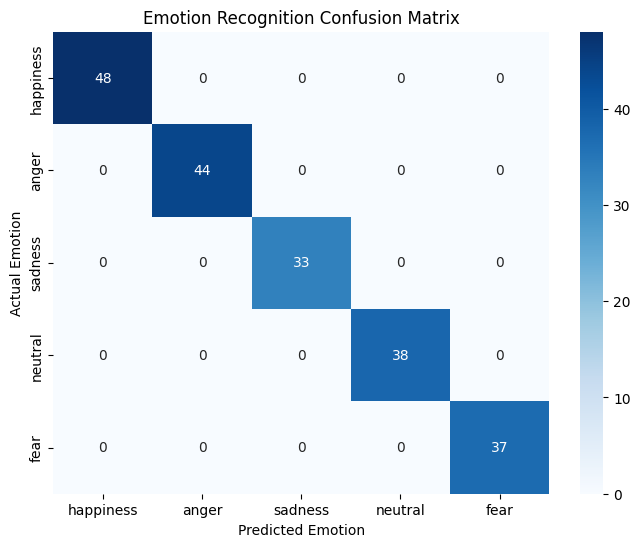


6. Testing with sample audio...

Testing happiness sample:
Predicted emotion: happiness
Emotion probabilities:
  happiness: 0.000
  anger: 0.000
  sadness: 1.000
  neutral: 0.000
  fear: 0.000

Testing anger sample:
Predicted emotion: anger
Emotion probabilities:
  happiness: 1.000
  anger: 0.000
  sadness: 0.000
  neutral: 0.000
  fear: 0.000

Testing sadness sample:
Predicted emotion: sadness
Emotion probabilities:
  happiness: 0.000
  anger: 0.000
  sadness: 0.000
  neutral: 0.000
  fear: 1.000

=== Emotion Recognition Complete ===


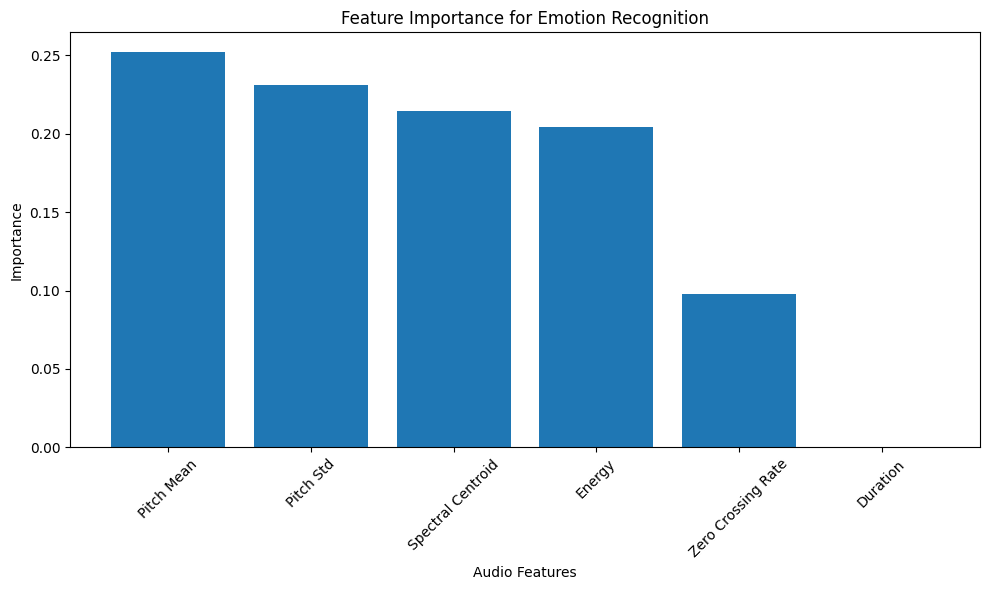

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

class SimpleEmotionRecognizer:
    def __init__(self):
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.emotions = ['happiness', 'anger', 'sadness', 'neutral', 'fear']
        
    def extract_features(self, audio_data):
        """Extract simple audio features from speech"""
        # Simulate audio feature extraction
        # In reality, you'd use libraries like librosa to extract real features
        features = {
            'pitch_mean': np.mean(audio_data),
            'pitch_std': np.std(audio_data),
            'energy': np.sum(audio_data ** 2),
            'zero_crossing_rate': np.sum(np.diff(np.sign(audio_data)) != 0),
            'spectral_centroid': np.mean(np.abs(np.fft.fft(audio_data))),
            'duration': len(audio_data) / 16000,  # assuming 16kHz sample rate
        }
        return list(features.values())
    
    def generate_sample_data(self, n_samples=1000):
        """Generate synthetic audio features for different emotions"""
        np.random.seed(42)
        
        data = []
        labels = []
        
        for emotion_idx, emotion in enumerate(self.emotions):
            for _ in range(n_samples // len(self.emotions)):
                # Generate different patterns for each emotion
                if emotion == 'happiness':
                    # Higher pitch, more energy
                    audio = np.random.normal(200, 50, 1000) + np.sin(np.linspace(0, 10, 1000)) * 100
                elif emotion == 'anger':
                    # High energy, variable pitch
                    audio = np.random.normal(180, 80, 1000) + np.random.normal(0, 100, 1000)
                elif emotion == 'sadness':
                    # Lower pitch, less energy
                    audio = np.random.normal(120, 30, 1000) + np.sin(np.linspace(0, 5, 1000)) * 50
                elif emotion == 'neutral':
                    # Moderate values
                    audio = np.random.normal(150, 40, 1000)
                else:  # fear
                    # Quick variations, moderate pitch
                    audio = np.random.normal(160, 60, 1000) + np.random.normal(0, 80, 1000)
                
                features = self.extract_features(audio)
                data.append(features)
                labels.append(emotion)
        
        return np.array(data), np.array(labels)
    
    def train(self, X, y):
        """Train the emotion recognition model"""
        print("Training emotion recognition model...")
        self.model.fit(X, y)
        print("Training completed!")
    
    def predict(self, X):
        """Predict emotions from audio features"""
        return self.model.predict(X)
    
    def predict_proba(self, X):
        """Get prediction probabilities"""
        return self.model.predict_proba(X)
    
    def evaluate(self, X_test, y_test):
        """Evaluate model performance"""
        predictions = self.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        
        print(f"Model Accuracy: {accuracy:.3f}")
        print("\nDetailed Classification Report:")
        print(classification_report(y_test, predictions))
        
        return accuracy, predictions
    
    def plot_confusion_matrix(self, y_test, predictions):
        """Plot confusion matrix"""
        cm = confusion_matrix(y_test, predictions)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=self.emotions, yticklabels=self.emotions)
        plt.title('Emotion Recognition Confusion Matrix')
        plt.xlabel('Predicted Emotion')
        plt.ylabel('Actual Emotion')
        plt.show()
    
    def predict_emotion(self, audio_sample):
        """Predict emotion from a single audio sample"""
        features = self.extract_features(audio_sample)
        features = np.array(features).reshape(1, -1)
        
        emotion = self.predict(features)[0]
        probabilities = self.predict_proba(features)[0]
        
        # Create probability dictionary
        emotion_probs = dict(zip(self.emotions, probabilities))
        
        return emotion, emotion_probs

def main():
    """Main function to run emotion recognition"""
    print("=== Simple Emotion Recognition from Speech ===\n")
    
    # Initialize model
    recognizer = SimpleEmotionRecognizer()
    
    # Step 1: Generate sample data
    print("1. Generating sample audio data...")
    X, y = recognizer.generate_sample_data(1000)
    print(f"Generated {len(X)} samples with {len(X[0])} features each")
    
    # Step 2: Split data
    print("\n2. Splitting data...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training: {len(X_train)} samples, Testing: {len(X_test)} samples")
    
    # Step 3: Train model
    print("\n3. Training model...")
    recognizer.train(X_train, y_train)
    
    # Step 4: Evaluate model
    print("\n4. Evaluating model...")
    accuracy, predictions = recognizer.evaluate(X_test, y_test)
    
    # Step 5: Plot results
    print("\n5. Visualizing results...")
    recognizer.plot_confusion_matrix(y_test, predictions)
    
    # Step 6: Test with sample audio
    print("\n6. Testing with sample audio...")
    
    # Generate sample audio for each emotion
    test_emotions = ['happiness', 'anger', 'sadness']
    
    for emotion in test_emotions:
        print(f"\nTesting {emotion} sample:")
        
        # Generate sample audio based on emotion
        if emotion == 'happiness':
            sample_audio = np.random.normal(200, 50, 1000) + np.sin(np.linspace(0, 10, 1000)) * 100
        elif emotion == 'anger':
            sample_audio = np.random.normal(180, 80, 1000) + np.random.normal(0, 100, 1000)
        else:  # sadness
            sample_audio = np.random.normal(120, 30, 1000) + np.sin(np.linspace(0, 5, 1000)) * 50
        
        predicted_emotion, probabilities = recognizer.predict_emotion(sample_audio)
        
        print(f"Predicted emotion: {predicted_emotion}")
        print("Emotion probabilities:")
        for emo, prob in probabilities.items():
            print(f"  {emo}: {prob:.3f}")
    
    print("\n=== Emotion Recognition Complete ===")
    return recognizer

# Feature importance visualization
def plot_feature_importance(recognizer, X_train):
    """Plot feature importance"""
    feature_names = ['Pitch Mean', 'Pitch Std', 'Energy', 'Zero Crossing Rate', 'Spectral Centroid', 'Duration']
    importances = recognizer.model.feature_importances_
    
    plt.figure(figsize=(10, 6))
    indices = np.argsort(importances)[::-1]
    
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
    plt.title('Feature Importance for Emotion Recognition')
    plt.xlabel('Audio Features')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

# Run the main function
if __name__ == "__main__":
    recognizer = main()
    
    # Show feature importance
    X, y = recognizer.generate_sample_data(1000)
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)
    plot_feature_importance(recognizer, X_train)